# How to Play Sounds on the Raspberry Pi

## 1. Stopping the Bootup Sound

If your Raspberry Pi is "speaking the IP address" at bootup, you need to `kill` the process that is currently in an infinite loop doing that.

`kill` is a command for killing a process on a Linux/Unix device: https://shapeshed.com/unix-kill/

To issue Linux/Unix commands, you need to use the Terminal/Command Prompt.

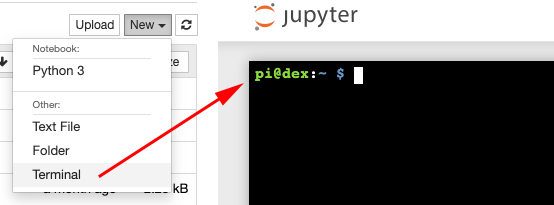

On boot-up the audio-port (audio jack) is being used to "read out" the IP address. This is being done by the following file: `/home/pi/aud.sh`.  When the Raspberry Pi boots up, that command (`aud.sh`) is automatically run and, in an infinite loop, reads out the IP address.

Thus, to turn it off, you need to `kill` the process (or more than one, if more than one is running) that is running.

From a terminal window, execute the command: `ps aux | grep aud.sh`

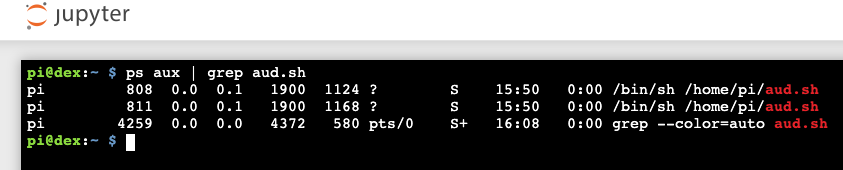

This will show you all the running processes (`ps aux`) and then show you the ones associated with/containing the string "`aud.sh`". In the example above, there are two processes running that are reading out the sound (`aud.sh`). You want to look at the second column to get the Process ID (the first number listed) for each.  Then type "`kill ###`" and use the number listed for each process.

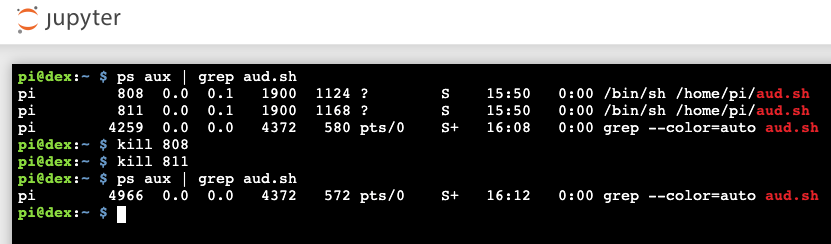

Then not only should the process be "killed" (not running any more) but no sound should be coming out of the audio-port/audio jack.

## 2. Doing Text-to-Speech

There is a built in package (same one that `aud.sh` uses) for converting text-to-speech and emiting it via the audio-port/audio jack.

Here we make an OS system call in Python (via the `os` module) and use the Flite text-to-speech package (from CMU).

http://www.festvox.org/flite/

In [ ]:
import os
os.system('echo "Hello there" | ~/flite/bin/flite')

Here is a more generic version using a function and string as a parameter.

In [ ]:
import os

# define function to read out the input_string
def speak(input_string):
    os.system('echo "' + str(input_string) + '" | ~/flite/bin/flite')
    return

# test
text = "Hello there"
speak(text)

## 3. Playing a Sound File

This example works with `.wav` sound files (it might work with other ones too, or maybe you have to convert them).

This uses the `pygame` module: https://www.pygame.org/download.shtml

The following code for playing a sound file comes from here:
https://raspberrypi.stackexchange.com/questions/7088/playing-audio-files-with-python

Your sound file (the `.wav` file) should be stored in the same Jupyter Notebook directory as this notebook.

The code initializes a `pygame.mixer` instance, loads the file, and plays it.  Then you can use built in `pygame.mixer.music` functions to control the music (e.g. in the following example it waits until the sound has finished before moving on).

`pygame.mixer.music` documentation: https://www.pygame.org/docs/ref/music.html

More on the Python `continue` function here: https://www.programiz.com/python-programming/break-continue

In [ ]:
import pygame

sound_file = "piano.wav"
pygame.mixer.init()
pygame.mixer.music.load(sound_file)
pygame.mixer.music.play()
print('Playing Sound')

while pygame.mixer.music.get_busy() == True:
    continue

print('Done Playing')